In [54]:
import pandas as pd
import json

# Load Data

Source: <https://www.kaggle.com/datasets/jannalipenkova/cleantech-media-dataset>

In [55]:
# load raw data
df_cleantech_media = pd.read_csv('../data/cleantech_media_dataset_v2_2024-02-23.csv', index_col=0, parse_dates=['date'])
df_cleantech_media

title       date author  \
1280   Qatar to Slash Emissions as LNG Expansion Adva... 2021-01-13    NaN   
1281                India Launches Its First 700 MW PHWR 2021-01-15    NaN   
1283               New Chapter for US-China Energy Trade 2021-01-20    NaN   
1284   Japan: Slow Restarts Cast Doubt on 2030 Energy... 2021-01-22    NaN   
1285      NYC Pension Funds to Divest Fossil Fuel Shares 2021-01-25    NaN   
...                                                  ...        ...    ...   
81812  Strata Clean Energy Nets $ 300 Million in Fund... 2023-11-06    NaN   
81813  Orsted Deploying SparkCognition Renewable Suit... 2023-11-07    NaN   
81814     Veolia Has Plans for 5 MW of Solar in Arkansas 2023-11-07    NaN   
81815                      SunEdison: Too Big, Too Fast? 2023-11-08    NaN   
81816  Vikings Solar-Plus-Storage Development Nets Fi... 2023-11-08    NaN   

                                                 content            domain  \
1280   ["Qatar Petroleum ( QP) is targeting aggressiv...       energyintel   
1281   ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...       energyintel   
1283   ["New US President Joe Biden took office this ...       energyintel   
1284   ["The slow pace of Japanese reactor restarts c...       energyintel   
1285   ["Two of New York City's largest pension funds...       energyintel   
...                                                  ...               ...   
81812  ['Strata Clean Energy has closed a $ 300 milli...  solarindustrymag   
81813  ['Global renewable energy developer Ørsted is ...  solarindustrymag   
81814  ['Veolia North America, a provider of environm...  solarindustrymag   
81815  ['Once the self-proclaimed “ leading renewable...  solarindustrymag   
81816  ['Arevon Energy Inc. has closed financing on t...  solarindustrymag   

                                                     url  
1280   https://www.energyintel.com/0000017b-a7dc-de4c...  
1281   https://www.energyintel.com/0000017b-a7dc-de4c...  
1283   https://www.energyintel.com/0000017b-a7dc-de4c...  
1284   https://www.energyintel.com/0000017b-a7dc-de4c...  
1285   https://www.energyintel.com/0000017b-a7dc-de4c...  
...                                                  ...  
81812  https://solarindustrymag.com/strata-clean-ener...  
81813  https://solarindustrymag.com/orsted-deploying-...  
81814  https://solarindustrymag.com/veolia-has-plans-...  
81815  http://www.solarindustrymag.com/online/issues/...  
81816  https://solarindustrymag.com/vikings-solar-plu...  

[9593 rows x 6 columns]

In [56]:
df_cleantech_media.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9593 entries, 1280 to 81816
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    9593 non-null   object        
 1   date     9593 non-null   datetime64[ns]
 2   author   31 non-null     object        
 3   content  9593 non-null   object        
 4   domain   9593 non-null   object        
 5   url      9593 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 524.6+ KB


In [57]:
(df_cleantech_media.date.max(), df_cleantech_media.date.min())

(Timestamp('2023-12-05 00:00:00'), Timestamp('2021-01-01 00:00:00'))

We have 9593 articels in the dataset, but only 31 have an author. The rest of the columns seems to be complete. The articles seem to be published in the timespan from 2021-01-01 to 2023-12-05.

## Cleaning the content-column

In [58]:
# content seems to be have some strange leading/trailing characters
df_cleantech_media.content.str[-30:]

1280     .9'20). Rafiq Latta, Nicosia"]
1281     consortium first ( related)."]
1283     ntensifies ( PIW Jan.15'21)."]
1284     te completion until October."]
1285     ). Kathrine Schmidt, Houston"]
                      ...              
81812    ns Inc. All Rights Reserved.']
81813    ns Inc. All Rights Reserved.']
81814    ns Inc. All Rights Reserved.']
81815    onary tale for the industry.']
81816    ns Inc. All Rights Reserved.']
Name: content, Length: 9593, dtype: object

In [59]:
df_cleantech_media.content.str[:30]

1280     ["Qatar Petroleum ( QP) is tar
1281     ["• Nuclear Power Corp. of Ind
1283     ["New US President Joe Biden t
1284     ["The slow pace of Japanese re
1285     ["Two of New York City's large
                      ...              
81812    ['Strata Clean Energy has clos
81813    ['Global renewable energy deve
81814    ['Veolia North America, a prov
81815    ['Once the self-proclaimed “ l
81816    ['Arevon Energy Inc. has close
Name: content, Length: 9593, dtype: object

In [60]:
# get rid of all trailing/leading character which are no alpha-numeric - the ugly but working way (regex did not)
df_cleantech_media.content = df_cleantech_media['content'].str.strip('[]"\'• ')
df_cleantech_media

title       date author  \
1280   Qatar to Slash Emissions as LNG Expansion Adva... 2021-01-13    NaN   
1281                India Launches Its First 700 MW PHWR 2021-01-15    NaN   
1283               New Chapter for US-China Energy Trade 2021-01-20    NaN   
1284   Japan: Slow Restarts Cast Doubt on 2030 Energy... 2021-01-22    NaN   
1285      NYC Pension Funds to Divest Fossil Fuel Shares 2021-01-25    NaN   
...                                                  ...        ...    ...   
81812  Strata Clean Energy Nets $ 300 Million in Fund... 2023-11-06    NaN   
81813  Orsted Deploying SparkCognition Renewable Suit... 2023-11-07    NaN   
81814     Veolia Has Plans for 5 MW of Solar in Arkansas 2023-11-07    NaN   
81815                      SunEdison: Too Big, Too Fast? 2023-11-08    NaN   
81816  Vikings Solar-Plus-Storage Development Nets Fi... 2023-11-08    NaN   

                                                 content            domain  \
1280   Qatar Petroleum ( QP) is targeting aggressive ...       energyintel   
1281   Nuclear Power Corp. of India Ltd. ( NPCIL) syn...       energyintel   
1283   New US President Joe Biden took office this we...       energyintel   
1284   The slow pace of Japanese reactor restarts con...       energyintel   
1285   Two of New York City's largest pension funds s...       energyintel   
...                                                  ...               ...   
81812  Strata Clean Energy has closed a $ 300 million...  solarindustrymag   
81813  Global renewable energy developer Ørsted is de...  solarindustrymag   
81814  Veolia North America, a provider of environmen...  solarindustrymag   
81815  Once the self-proclaimed “ leading renewable p...  solarindustrymag   
81816  Arevon Energy Inc. has closed financing on the...  solarindustrymag   

                                                     url  
1280   https://www.energyintel.com/0000017b-a7dc-de4c...  
1281   https://www.energyintel.com/0000017b-a7dc-de4c...  
1283   https://www.energyintel.com/0000017b-a7dc-de4c...  
1284   https://www.energyintel.com/0000017b-a7dc-de4c...  
1285   https://www.energyintel.com/0000017b-a7dc-de4c...  
...                                                  ...  
81812  https://solarindustrymag.com/strata-clean-ener...  
81813  https://solarindustrymag.com/orsted-deploying-...  
81814  https://solarindustrymag.com/veolia-has-plans-...  
81815  http://www.solarindustrymag.com/online/issues/...  
81816  https://solarindustrymag.com/vikings-solar-plu...  

[9593 rows x 6 columns]

## Check for duplicates

In [61]:
# content is propably the most important column, we check its contents
df_cleantech_media[df_cleantech_media.duplicated(subset=['content'], keep=False)]

title       date author  \
6685   Indonesia seeks investors for giant geothermal... 2022-12-09    NaN   
6689   Indonesia seeks investors for giant geothermal... 2022-12-09    NaN   
78210  Portugal energy transition plan targets massiv... 2023-07-03    NaN   
78212  Wind, hydrogen and solar fused in Portugal's p... 2023-07-03    NaN   
78215  China's wind giants are chasing global growth:... 2023-07-06    NaN   
78216  Why geopolitics will set the limits of China's... 2023-07-06    NaN   
78225  Quest for endless green energy from Earth's co... 2023-07-17    NaN   
78227  Limitless green energy from Earth's core quest... 2023-07-17    NaN   
80067  Sodium-ion battery production capacity to grow... 2023-07-17    NaN   
80073  Sodium-ion battery fleet to grow to 10 GWh by ... 2023-07-17    NaN   

                                                 content        domain  \
6685   Indonesia, home to the world’ s largest geothe...   energyvoice   
6689   Indonesia, home to the world’ s largest geothe...   energyvoice   
78210  Portugal has more than doubled its 2030 goals ...  rechargenews   
78212  Portugal has more than doubled its 2030 goals ...  rechargenews   
78215  Geopolitics as much as price or quality will d...  rechargenews   
78216  Geopolitics as much as price or quality will d...  rechargenews   
78225  One of Japan’ s largest utility groups Chubu E...  rechargenews   
78227  One of Japan’ s largest utility groups Chubu E...  rechargenews   
80067  Global demand for sodium-ion batteries is expe...   pv-magazine   
80073  Global demand for sodium-ion batteries is expe...   pv-magazine   

                                                     url  
6685   https://www.energyvoice.com/oilandgas/467719/i...  
6689   https://sgvoice.energyvoice.com/investing/2002...  
78210  https://www.rechargenews.com/energy-transition...  
78212  https://www.rechargenews.com/energy-transition...  
78215  https://www.rechargenews.com/wind/chinas-wind-...  
78216  https://www.rechargenews.com/wind/why-geopolit...  
78225  https://www.rechargenews.com/energy-transition...  
78227      https://www.rechargenews.com/news/2-1-1487279  
80067  https://www.pv-magazine.com/2023/07/17/sodium-...  
80073  https://www.pv-magazine.com/2023/07/17/sodium-...

In [62]:
# drop the five duplicates found before
df_cleantech_media.drop_duplicates(subset=['content'], inplace=True)
df_cleantech_media.shape

(9588, 6)

# First Overview

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

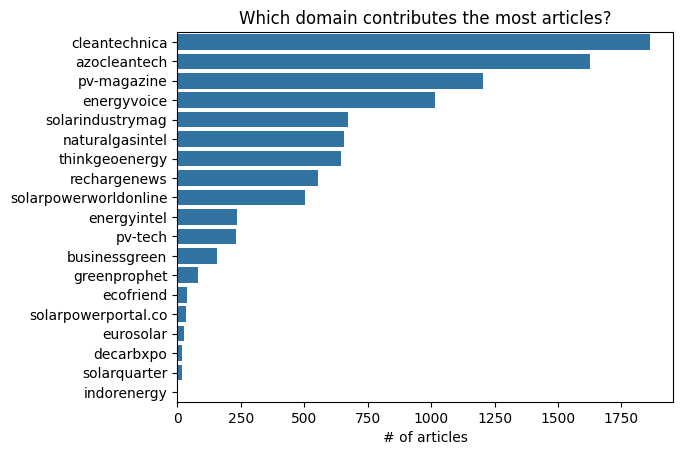

In [64]:
sns.countplot(
    df_cleantech_media, 
    y="domain", 
    order=df_cleantech_media['domain'].value_counts().index)

plt.title("Which domain contributes the most articles?")
plt.xlabel("# of articles")
plt.ylabel("")
plt.show()

Before when checking for the trailing characters I saw some "all rights reserved". So I wanted to know which fraction of articles is meant to be "protected" by their writers.

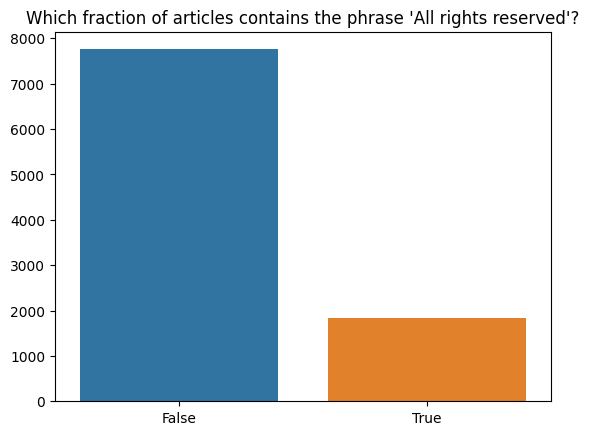

In [65]:
df_plot = df_cleantech_media[['content']].copy()
df_plot['contains_rights_reserved'] = df_plot.content.str.lower().str.contains('all rights reserved')
sns.countplot(
    df_plot, 
    x="contains_rights_reserved", 
    hue="contains_rights_reserved",
    legend=False
)

plt.xlabel("")
plt.ylabel("")
plt.title("Which fraction of articles contains the phrase 'All rights reserved'?");

The question remains: should these be in a public dataset? Should we use these for research?

# Text preprocessing

In [66]:
import re
import nltk


## Newlines, spaces and tabs removal <a name="spaces-rmvl"></a>

In [67]:
# Function to remove the numbers in a column
def remove_whitespace(text):
    re_numbers = re.sub('[\t\n\r\f ]+', ' ', text)
    return re_numbers

# Remove the whitespaces in the abstract column
df_cleantech_media.loc[:, "content"] = df_cleantech_media["content"].apply(remove_whitespace)

# Remove numbers

In [68]:
# Function to remove the numbers in a column
def remove_numbers(text):
    re_numbers = re.sub(r'\d+', '', text)
    return re_numbers

# Remove the numbers in the abstract column
df_cleantech_media.loc[:, "token_content"] = df_cleantech_media["content"].apply(remove_numbers)

# Tokenize Words

In [69]:
type(df_cleantech_media["content"])
df_cleantech_media["content"]

1280     Qatar Petroleum ( QP) is targeting aggressive ...
1281     Nuclear Power Corp. of India Ltd. ( NPCIL) syn...
1283     New US President Joe Biden took office this we...
1284     The slow pace of Japanese reactor restarts con...
1285     Two of New York City's largest pension funds s...
                               ...                        
81812    Strata Clean Energy has closed a $ 300 million...
81813    Global renewable energy developer Ørsted is de...
81814    Veolia North America, a provider of environmen...
81815    Once the self-proclaimed “ leading renewable p...
81816    Arevon Energy Inc. has closed financing on the...
Name: content, Length: 9588, dtype: object

In [70]:
# Function to clean and extract data
def tokenize_column(data):
    # Split the data based on the pattern '(extra_info)'
    re_tokens = re.findall('[\w]+', data)
    # Return the first part, which is the cleaned data
    return re_tokens

df_cleantech_media["token_content"] = df_cleantech_media["token_content"].apply(tokenize_column)

df_cleantech_media["token_content"]

1280     [Qatar, Petroleum, QP, is, targeting, aggressi...
1281     [Nuclear, Power, Corp, of, India, Ltd, NPCIL, ...
1283     [New, US, President, Joe, Biden, took, office,...
1284     [The, slow, pace, of, Japanese, reactor, resta...
1285     [Two, of, New, York, City, s, largest, pension...
                               ...                        
81812    [Strata, Clean, Energy, has, closed, a, millio...
81813    [Global, renewable, energy, developer, Ørsted,...
81814    [Veolia, North, America, a, provider, of, envi...
81815    [Once, the, self, proclaimed, leading, renewab...
81816    [Arevon, Energy, Inc, has, closed, financing, ...
Name: token_content, Length: 9588, dtype: object

# Stopwords Removal

In [71]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words_nltk = stopwords.words('english')

# Function to remove the stopwords
def stopwords_removal(data):
    # Split the data based on the pattern '(extra_info)'
    filtered_stopwords = []
    for word in data:
        if word.lower() not in stop_words_nltk:
            filtered_stopwords.append(word)
        else:
            pass

    return filtered_stopwords

# Apply stopwords removal function to the 'content' column
df_cleantech_media["token_content"] = df_cleantech_media["token_content"].apply(stopwords_removal)

print(len(df_cleantech_media["token_content"] ), df_cleantech_media["token_content"] )

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Viktor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


9588 1280     [Qatar, Petroleum, QP, targeting, aggressive, ...
1281     [Nuclear, Power, Corp, India, Ltd, NPCIL, sync...
1283     [New, US, President, Joe, Biden, took, office,...
1284     [slow, pace, Japanese, reactor, restarts, cont...
1285     [Two, New, York, City, largest, pension, funds...
                               ...                        
81812    [Strata, Clean, Energy, closed, million, revol...
81813    [Global, renewable, energy, developer, Ørsted,...
81814    [Veolia, North, America, provider, environment...
81815    [self, proclaimed, leading, renewable, power, ...
81816    [Arevon, Energy, Inc, closed, financing, Vikin...
Name: token_content, Length: 9588, dtype: object


# Lemmatization

In [72]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer
nltk_lemmatizer = WordNetLemmatizer()

# Function to lemmatize
def lemmatize_tokens(tokens):
    lemmatized_tokens = [nltk_lemmatizer.lemmatize(w) for w in tokens]
    return lemmatized_tokens

df_cleantech_media["token_content"] = df_cleantech_media["token_content"].apply(lemmatize_tokens)

# Display the DataFrame
print(df_cleantech_media["token_content"])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Viktor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Viktor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


1280     [Qatar, Petroleum, QP, targeting, aggressive, ...
1281     [Nuclear, Power, Corp, India, Ltd, NPCIL, sync...
1283     [New, US, President, Joe, Biden, took, office,...
1284     [slow, pace, Japanese, reactor, restarts, cont...
1285     [Two, New, York, City, largest, pension, fund,...
                               ...                        
81812    [Strata, Clean, Energy, closed, million, revol...
81813    [Global, renewable, energy, developer, Ørsted,...
81814    [Veolia, North, America, provider, environment...
81815    [self, proclaimed, leading, renewable, power, ...
81816    [Arevon, Energy, Inc, closed, financing, Vikin...
Name: token_content, Length: 9588, dtype: object


In [73]:
print(df_cleantech_media["token_content"].iloc[0])

['Qatar', 'Petroleum', 'QP', 'targeting', 'aggressive', 'cut', 'greenhouse', 'gas', 'emission', 'prepares', 'launch', 'Phase', 'planned', 'million', 'ton', 'per', 'year', 'LNG', 'expansion', 'latest', 'Sustainability', 'Report', 'published', 'Wednesday', 'QP', 'said', 'goal', 'include', 'reducing', 'emission', 'intensity', 'Qatar', 'LNG', 'facility', 'upstream', 'facility', 'least', 'company', 'also', 'aiming', 'reduce', 'gas', 'flaring', 'intensity', 'across', 'upstream', 'facility', 'raised', 'carbon', 'capture', 'storage', 'ambition', 'million', 'ton', 'yr', 'million', 'ton', 'yr', 'million', 'ton', 'yr', 'carbon', 'capture', 'goal', 'come', 'million', 'ton', 'yr', 'Phase', 'LNG', 'expansion', 'also', 'known', 'North', 'Field', 'East', 'project', 'million', 'ton', 'yr', 'come', 'Phase', 'known', 'North', 'Field', 'South', 'project', 'raise', 'Qatar', 'LNG', 'capacity', 'million', 'ton', 'yr', 'Qatar', 'currently', 'LNG', 'production', 'capacity', 'around', 'million', 'ton', 'yr', 'e

# Adding Pos Tags

In [74]:
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from collections import defaultdict

# Download NLTK resources
nltk.download('averaged_perceptron_tagger')

# Initialize default tag mapping
tag_map_nltk = defaultdict(lambda : wn.NOUN)
tag_map_nltk['J'] = wn.ADJ
tag_map_nltk['V'] = wn.VERB
tag_map_nltk['R'] = wn.ADV

# Function to lemmatize tokens with POS tagging
def adding_pos_tags(tokens):
    nltk_lemmatizer = nltk.WordNetLemmatizer()
    pos_tags = pos_tag(tokens)
    lemmatized_tokens = [nltk_lemmatizer.lemmatize(token, tag_map_nltk[tag[0]]) for token, tag in pos_tags]
    return lemmatized_tokens

df_cleantech_media["token_content"] = df_cleantech_media["token_content"].apply(adding_pos_tags)

# Display the DataFrame
print(df_cleantech_media["token_content"])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Viktor\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


1280     [Qatar, Petroleum, QP, target, aggressive, cut...
1281     [Nuclear, Power, Corp, India, Ltd, NPCIL, sync...
1283     [New, US, President, Joe, Biden, take, office,...
1284     [slow, pace, Japanese, reactor, restarts, cont...
1285     [Two, New, York, City, large, pension, fund, s...
                               ...                        
81812    [Strata, Clean, Energy, close, million, revolv...
81813    [Global, renewable, energy, developer, Ørsted,...
81814    [Veolia, North, America, provider, environment...
81815    [self, proclaim, lead, renewable, power, plant...
81816    [Arevon, Energy, Inc, close, financing, Viking...
Name: token_content, Length: 9588, dtype: object


# Stemming

In [75]:
from nltk.stem import PorterStemmer

# Initialize Porter Stemmer
ps = PorterStemmer()

# Function to stem tokens
def stem_tokens(tokens):
    stemmed_tokens = [ps.stem(w) for w in tokens]
    return stemmed_tokens

df_cleantech_media["token_content"] = df_cleantech_media["token_content"].apply(stem_tokens)

# Display the DataFrame
print(df_cleantech_media["token_content"])

1280     [qatar, petroleum, qp, target, aggress, cut, g...
1281     [nuclear, power, corp, india, ltd, npcil, sync...
1283     [new, us, presid, joe, biden, take, offic, wee...
1284     [slow, pace, japanes, reactor, restart, contin...
1285     [two, new, york, citi, larg, pension, fund, sa...
                               ...                        
81812    [strata, clean, energi, close, million, revolv...
81813    [global, renew, energi, develop, ørsted, deplo...
81814    [veolia, north, america, provid, environment, ...
81815    [self, proclaim, lead, renew, power, plant, de...
81816    [arevon, energi, inc, close, financ, vike, sol...
Name: token_content, Length: 9588, dtype: object


In [76]:
print(df_cleantech_media["token_content"].iloc[0])

['qatar', 'petroleum', 'qp', 'target', 'aggress', 'cut', 'greenhous', 'ga', 'emiss', 'prepar', 'launch', 'phase', 'plan', 'million', 'ton', 'per', 'year', 'lng', 'expans', 'late', 'sustain', 'report', 'publish', 'wednesday', 'qp', 'say', 'goal', 'includ', 'reduc', 'emiss', 'intens', 'qatar', 'lng', 'facil', 'upstream', 'facil', 'least', 'compani', 'also', 'aim', 'reduc', 'ga', 'flare', 'intens', 'across', 'upstream', 'facil', 'rais', 'carbon', 'captur', 'storag', 'ambit', 'million', 'ton', 'yr', 'million', 'ton', 'yr', 'million', 'ton', 'yr', 'carbon', 'captur', 'goal', 'come', 'million', 'ton', 'yr', 'phase', 'lng', 'expans', 'also', 'know', 'north', 'field', 'east', 'project', 'million', 'ton', 'yr', 'come', 'phase', 'known', 'north', 'field', 'south', 'project', 'rais', 'qatar', 'lng', 'capac', 'million', 'ton', 'yr', 'qatar', 'current', 'lng', 'product', 'capac', 'around', 'million', 'ton', 'yr', 'eye', 'phase', 'expans', 'million', 'ton', 'yr', 'qp', 'say', 'abl', 'elimin', 'routi

# Write to disk

In [77]:
df_cleantech_media.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9588 entries, 1280 to 81816
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          9588 non-null   object        
 1   date           9588 non-null   datetime64[ns]
 2   author         31 non-null     object        
 3   content        9588 non-null   object        
 4   domain         9588 non-null   object        
 5   url            9588 non-null   object        
 6   token_content  9588 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 599.2+ KB


In [78]:
df_cleantech_media.to_csv('../data/cleantech-media.csv', index=False)